In [19]:
cd /Users/amandaash/Desktop/Research/scripts/

/Users/amandaash/Desktop/Research/scripts


In [20]:
from __future__ import print_function, division, absolute_import

import os

%matplotlib inline
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy.io.ascii as at
import astropy.io.fits as fits
import astropy.units as u
from scipy.interpolate import interp1d
from cycler import cycler

In [21]:
from k2_class_master import kep_io

In [22]:
hdul = fits.open('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/EPIC_211822797_mastC16.fits')
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   65 / length of dimension 1                          
NAXIS2  =                 3814 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   10 / number of table fields                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'K2SC    '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
TELESCOP= 'Kepler  '           / telescope                                      
INSTRUME= 'Kepler Photometer

[2458095.46775264 2458095.48818801 2458095.50862347 ... 2458174.98206182
 2458175.0024967  2458175.02293149]


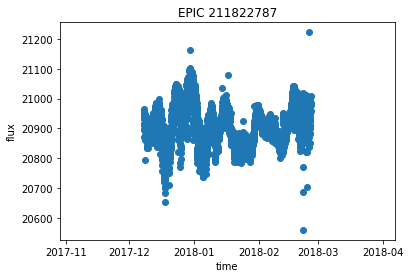

In [23]:
light_curve1 = kep_io.k2sff_io('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/EPIC_211822797_mastC16.fits')

time = light_curve1[0]
flux = light_curve1[1]

time_UTC = Time(time, format='jd', scale='utc').datetime
print(time)
#print(list(time_UTC))


plt.scatter(time_UTC,flux)
plt.xlabel('time')
plt.ylabel('flux')
plt.title('EPIC 211822787')
plt.show()

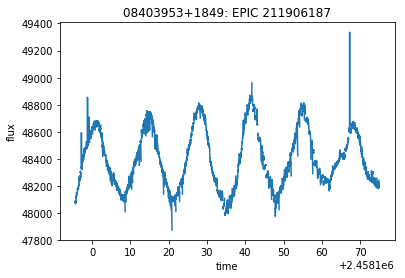

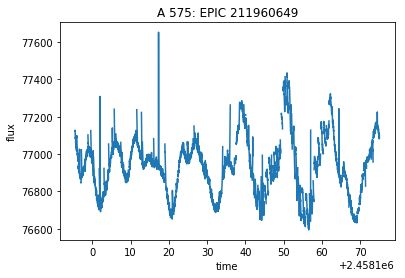

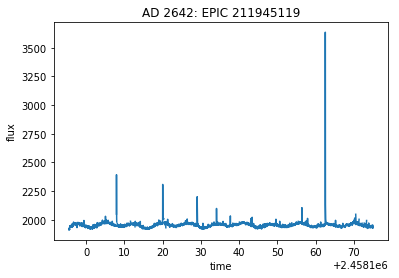

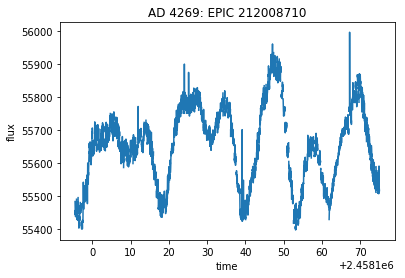

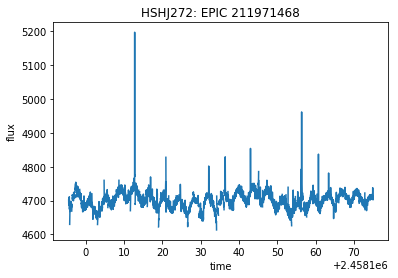

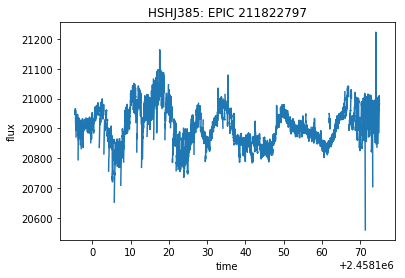

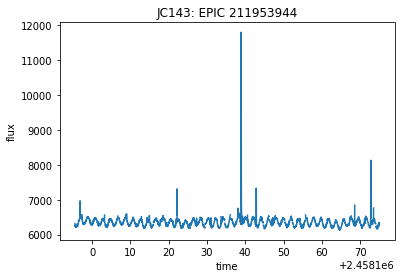

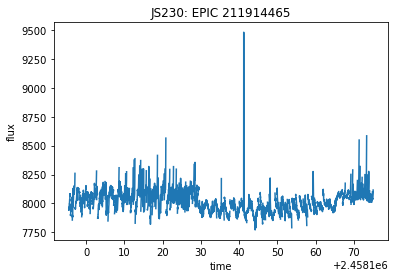

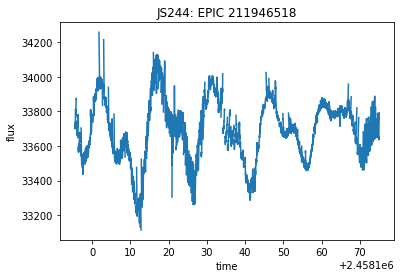

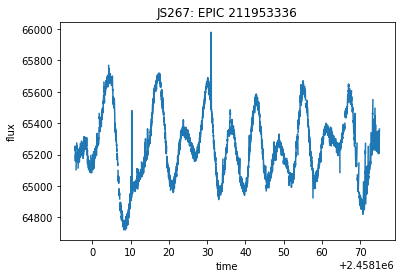

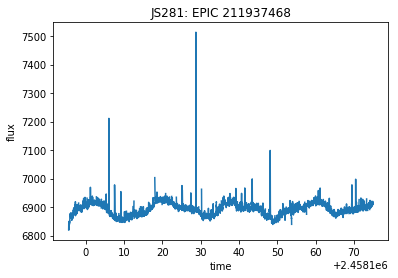

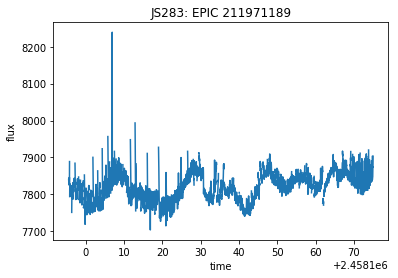

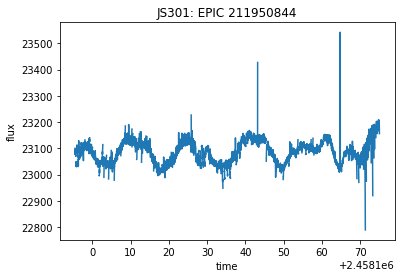

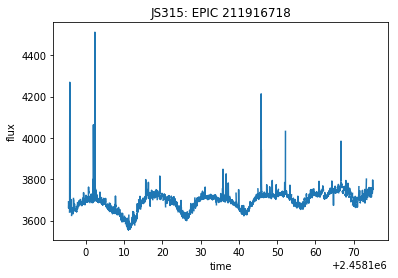

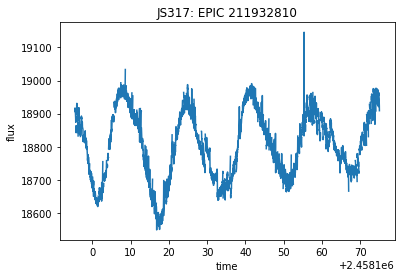

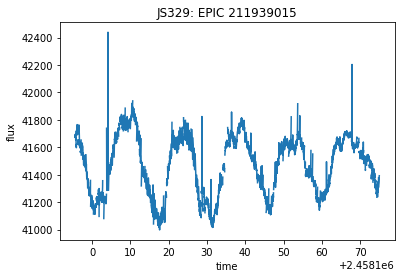

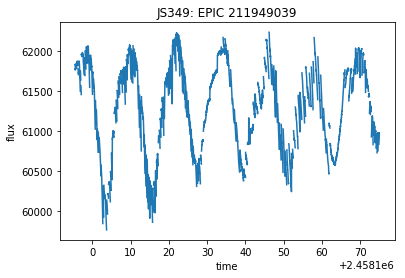

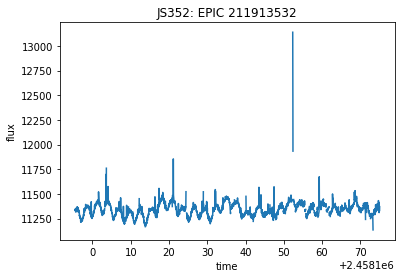

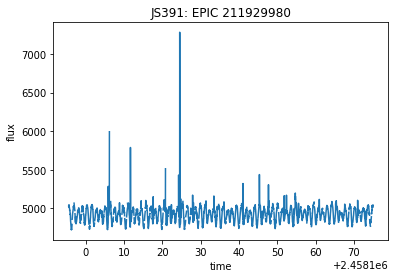

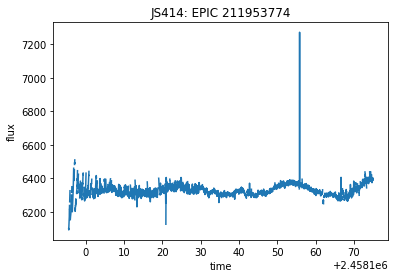

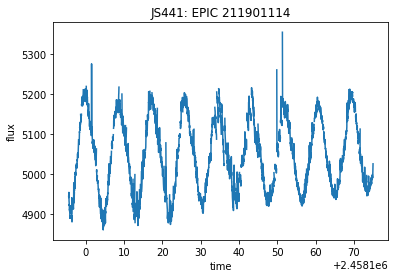

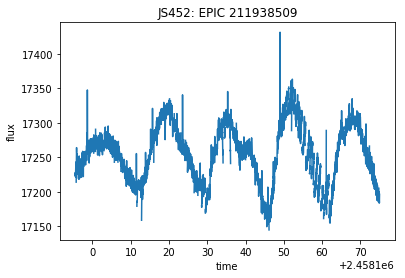

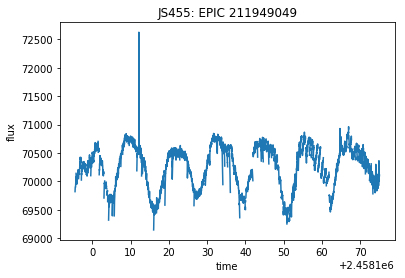

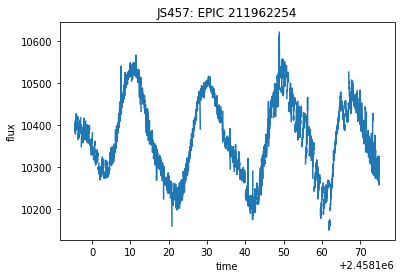

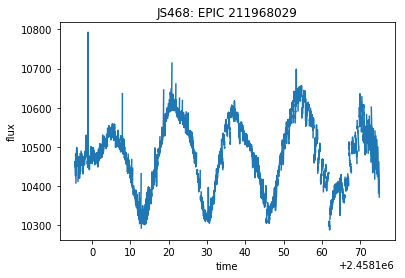

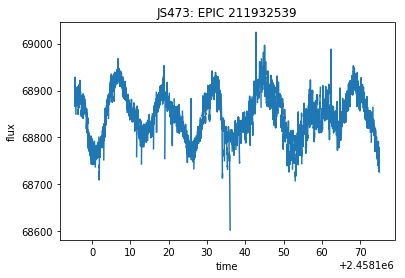

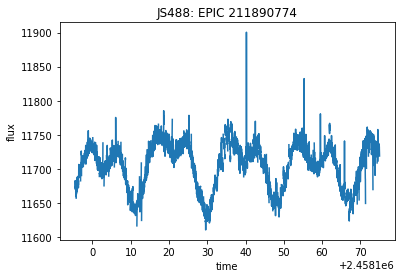

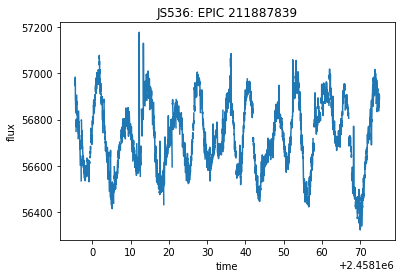

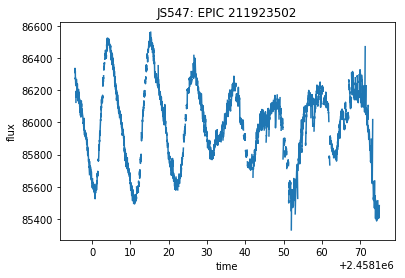

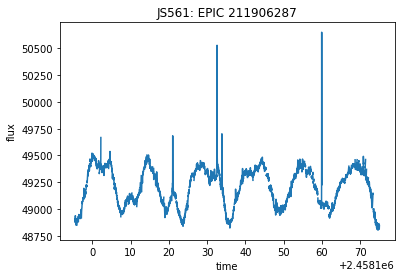

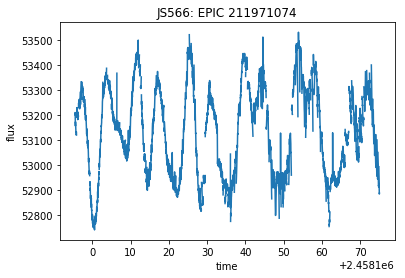

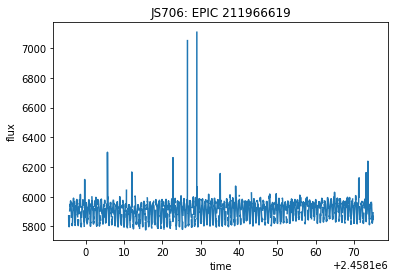

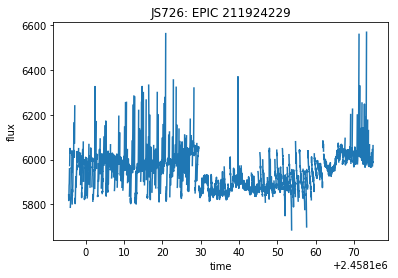

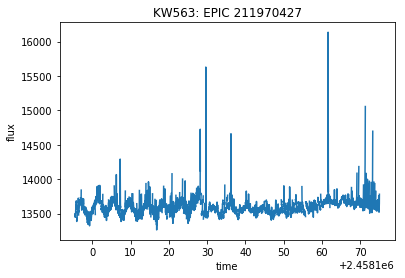

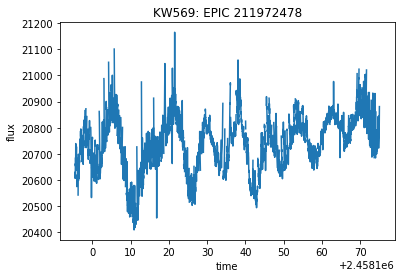

In [24]:
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/Research/observation_info/observation_table.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()


ID = []

for n in obs_tab[1:]:
    ID.append(n[0:2])

target_ID = np.unique(np.array(ID),axis = 0)

import glob

files = glob.glob('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/*.fits')
EPIC_ID = []
for file in files:
    ID = (file.split('/')[7]).split('_')[1]
    EPIC_ID.append(ID)


for target in target_ID:
    EPIC = target[1]
    if EPIC in EPIC_ID:
        index = EPIC_ID.index(EPIC)
        light_curve = files[index]
        time,flux = kep_io.k2sff_io(light_curve)
        #I need to convert Julian day to a date and time so I can compare it against the EW variability
        plt.plot(time,flux)
        plt.xlabel('time')
        plt.ylabel('flux')
        plt.title(target[0] + ': EPIC ' + str(EPIC) )
        plt.savefig('/Users/amandaash/Desktop/Research/plots/lightcurve/{0}_k2sff.pdf'.format(target[0]))
        plt.show()
        

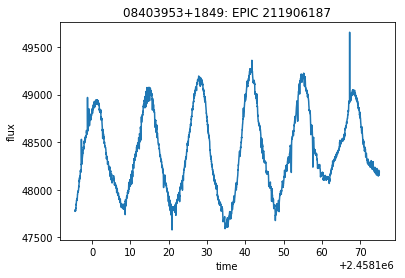

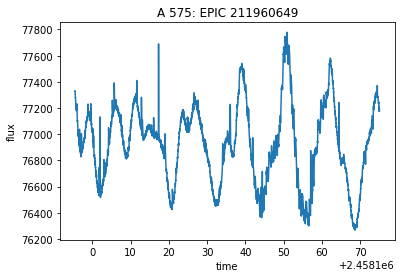

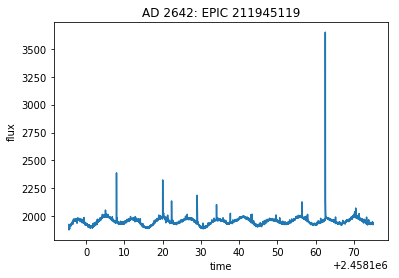

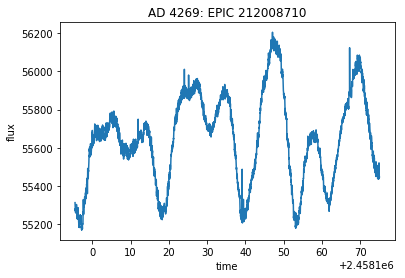

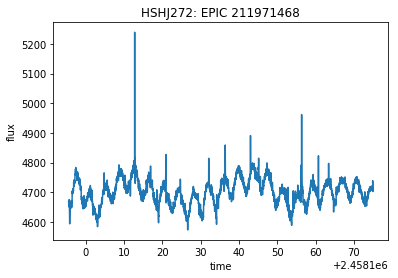

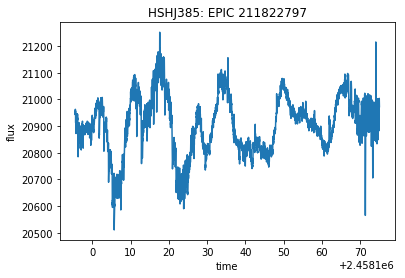

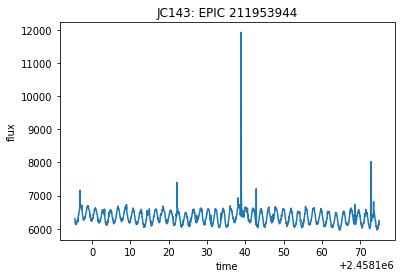

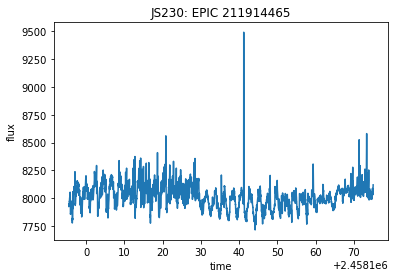

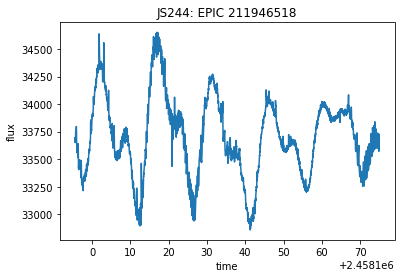

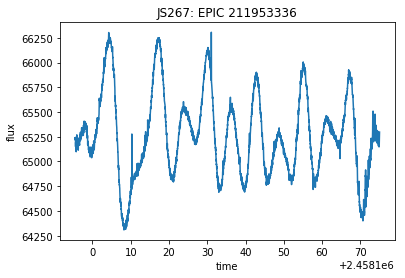

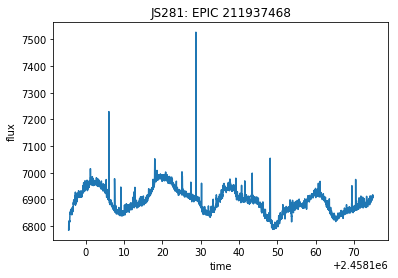

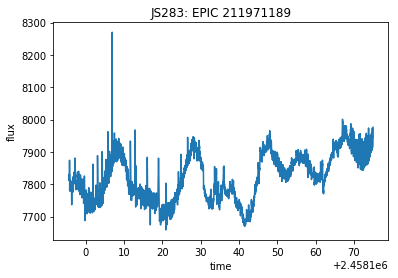

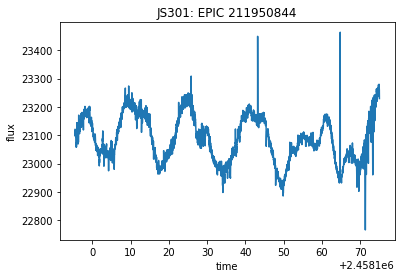

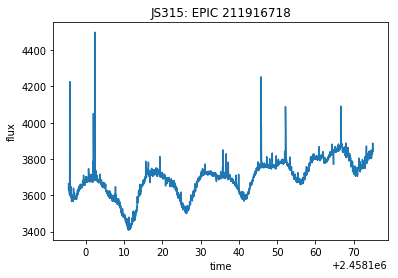

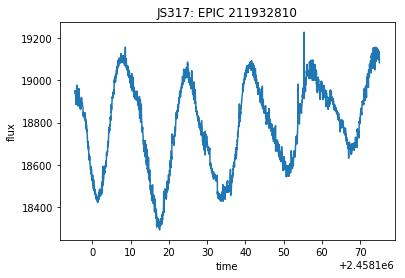

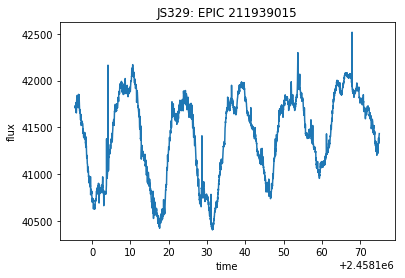

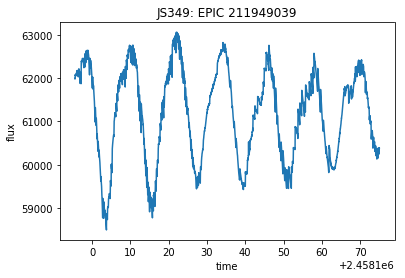

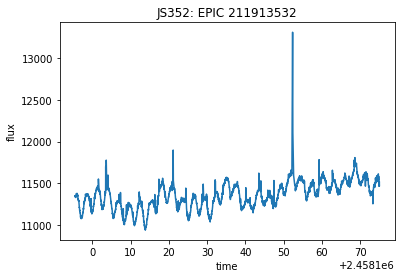

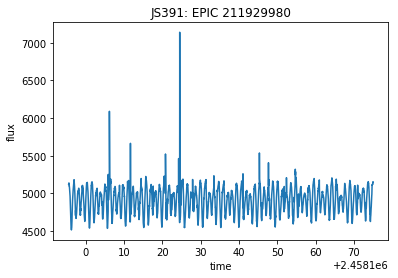

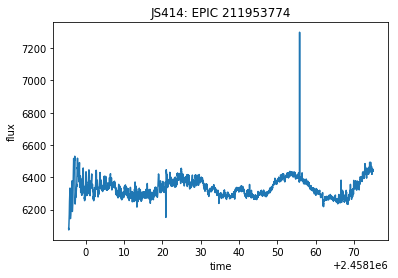

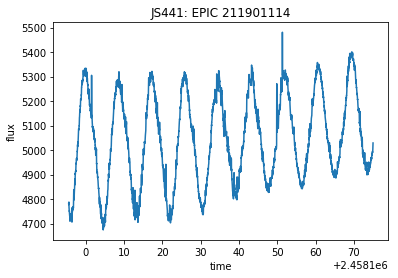

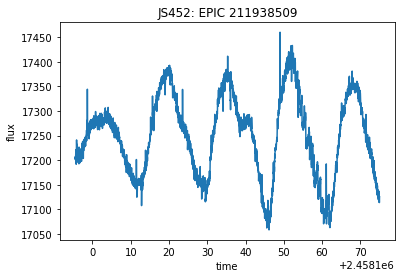

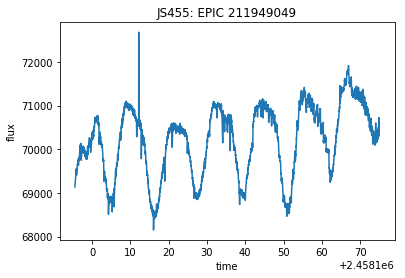

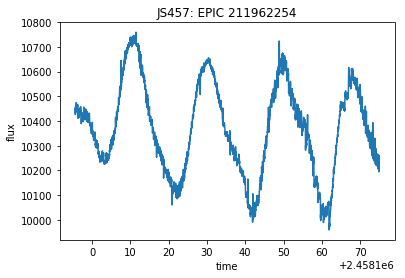

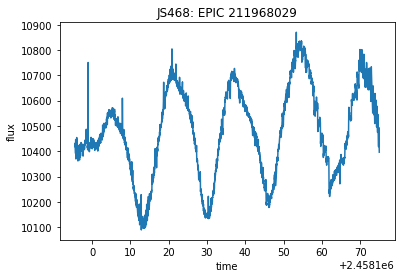

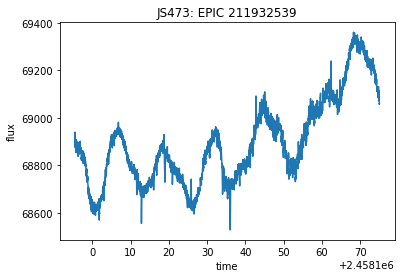

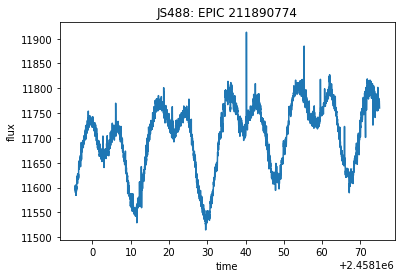

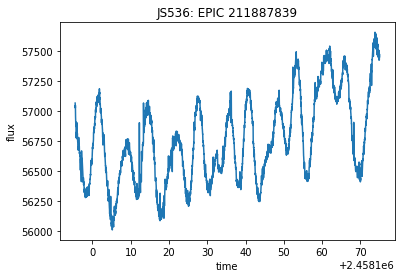

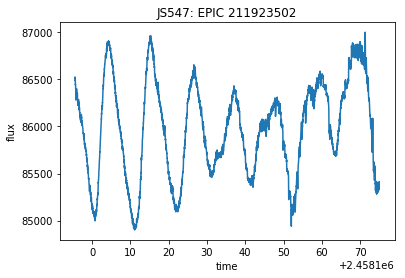

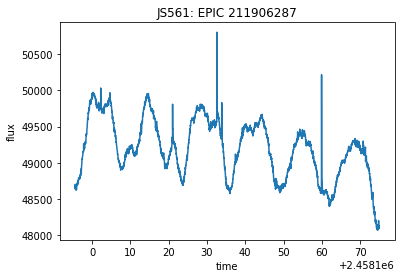

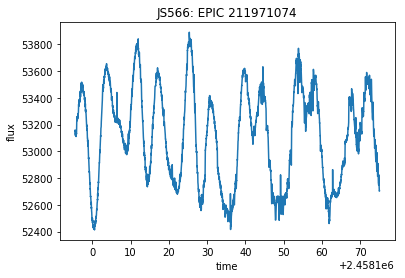

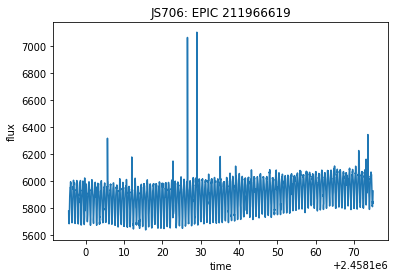

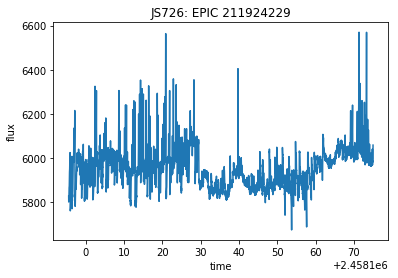

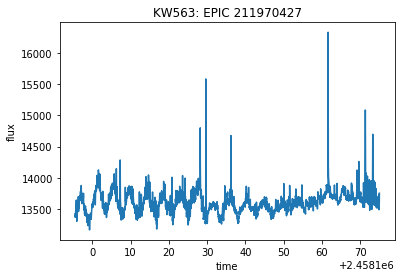

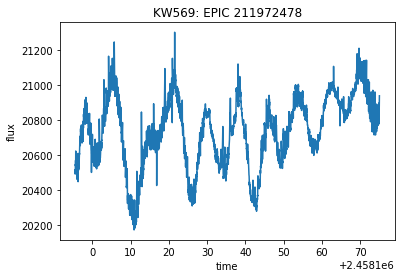

In [25]:
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/Research/observation_info/observation_table.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()


ID = []

for n in obs_tab[1:]:
    ID.append(n[0:2])

target_ID = np.unique(np.array(ID),axis = 0)

import glob

files = glob.glob('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/*.fits')
EPIC_ID = []
for file in files:
    ID = (file.split('/')[7]).split('_')[1]
    EPIC_ID.append(ID)

for target in target_ID:
    EPIC = target[1]
    if EPIC in EPIC_ID:
        index = EPIC_ID.index(EPIC)
        light_curve = files[index]
        time,flux = kep_io.k2sc_io(light_curve)
        plt.plot(time + 2454833,flux)
        plt.xlabel('time')
        plt.ylabel('flux')
        plt.title(target[0] + ': EPIC ' + str(EPIC) )
        plt.savefig('/Users/amandaash/Desktop/Research/plots/lightcurve/{0}_k2sc.pdf'.format(target[0]))
    plt.show()

In [27]:
obs_tab =[]
import csv

with open('/Users/amandaash/Desktop/Research/observation_info/observation_table.csv', 'r') as csvFile:
    obs_data = csv.reader(csvFile)
    for row in obs_data:
        obs_tab.append(row)
csvFile.close()

target_info = obs_tab[1:]

target_ID = []

for n in target_info:
    target_ID.append([n[0],n[1]])

target_list_ID = np.unique(np.array(target_ID),axis = 0)

files = glob.glob('/Users/amandaash/Desktop/Research/data/K2C16_Amanda/*.fits')
EPIC_ID = []
for file in files:
    ID = (file.split('/')[7]).split('_')[1]
    EPIC_ID.append(ID)

for n in target_list_ID:
    fig,(ax1, ax2) = plt.subplots(2,1)
    plt.rcParams['figure.figsize'] = [12, 10]
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    
    JD_array = []
    EqW_array = []
    lower_error_array = []
    upper_error_array = []
    
    for row in target_info:
        
        if row[0] == n[0]:
            EW16 = row[9]
            EW50 = row[10]
            EW84 = row[11]
            UTC_date = row[5]
            UTC_time = row[6]
            
            UTC = str(UTC_date)  + ' ' + str(UTC_time)
        
            
            UTC_time= Time(UTC, scale = 'utc')
    
            JD_time = UTC_time.jd
        
            JD_array.append(JD_time)
            
            EqW = float(EW50)
            perc16 = float(EW16)
            perc84 = float(EW84)
            lower_uncertainty = EqW - perc16
            lower_error_array.append(lower_uncertainty)
            upper_uncertainty = perc84 - EqW
            upper_error_array.append(upper_uncertainty)
            EqW_array.append(EqW)
        else:
            continue
        
        #now we're going to get the light curve stuff
    
    
    v = [lower_error_array, upper_error_array]
    ax1.errorbar(JD_array,EqW_array, yerr = v, fmt = 'o', color = 'b')
    ax1.set_ylim(np.max(EqW_array) + 3*np.std(EqW_array), np.min(EqW_array)-3*np.std(EqW_array))
    ax1.set_xlim(np.min(JD_array)-1, np.max(JD_array)+1)
    ax2.set_xlim(np.min(JD_array)-1, np.max(JD_array)+1)
    ax1.set_title(n[0] + ' EPIC ID: ' + n[1], fontsize = 30)
    ax1.set_ylabel(r'$H_{\alpha}\ EW\ (\AA)$', fontsize = 26, labelpad = 24)
    #ax1.set_xlabel('time (days)', fontsize = 26, labelpad = 24)
    ax1.tick_params(labelsize = 24)
    
    

    EPIC = n[1]
    if EPIC in EPIC_ID:
        index = EPIC_ID.index(EPIC)
        light_curve = files[index]
        time,flux = kep_io.k2sc_io(light_curve)
        ax2.plot(time + 2454833,flux)
        #ax2.set_xlabel('time')
        ax2.tick_params(labelsize = 24)
        ax2.set_ylabel('Flux (unit)', fontsize = 26, labelpad = 24)
        #ax2.set_title(n[0] + ': EPIC ' + str(EPIC) )
    
    
    plt.xlabel('time (JD)', fontsize = 26)
    plt.tight_layout()
    plt.savefig('/Users/amandaash/Desktop/Research/plots/EW_lightcurve/{0}.pdf'.format(n[0]))
    plt.close()
            